In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
x=tf.range(-300,300,4)
y=tf.range(-290,310,4)
x,y

(<tf.Tensor: shape=(150,), dtype=int32, numpy=
 array([-300, -296, -292, -288, -284, -280, -276, -272, -268, -264, -260,
        -256, -252, -248, -244, -240, -236, -232, -228, -224, -220, -216,
        -212, -208, -204, -200, -196, -192, -188, -184, -180, -176, -172,
        -168, -164, -160, -156, -152, -148, -144, -140, -136, -132, -128,
        -124, -120, -116, -112, -108, -104, -100,  -96,  -92,  -88,  -84,
         -80,  -76,  -72,  -68,  -64,  -60,  -56,  -52,  -48,  -44,  -40,
         -36,  -32,  -28,  -24,  -20,  -16,  -12,   -8,   -4,    0,    4,
           8,   12,   16,   20,   24,   28,   32,   36,   40,   44,   48,
          52,   56,   60,   64,   68,   72,   76,   80,   84,   88,   92,
          96,  100,  104,  108,  112,  116,  120,  124,  128,  132,  136,
         140,  144,  148,  152,  156,  160,  164,  168,  172,  176,  180,
         184,  188,  192,  196,  200,  204,  208,  212,  216,  220,  224,
         228,  232,  236,  240,  244,  248,  252,  256,  260,  26

In [ ]:
len(x),len(y)

(150, 150)

In [ ]:
y==x+10

<tf.Tensor: shape=(150,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  Tr

In [ ]:
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(1,input_shape=[1])
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model.fit(x,y,epochs=2000,verbose=0)

In [ ]:
x_train=x[:120]
y_train=y[:120]

x_test=x[120:]
y_test=y[120:]
len(x_train),len(x_test),len(y_train),len(y_test)

(120, 30, 120, 30)

In [ ]:
model.fit(x_train,y_train,epochs=100,verbose=0)

In [ ]:
tf.random.set_seed(42)
#making sample model
model1=tf.keras.Sequential([
                            tf.keras.layers.Dense(1,activation="relu",input_shape=[1],name="inner_layer"),
                            tf.keras.layers.Dense(100,activation="relu"),
                            tf.keras.layers.Dense(100,activation="relu"),
                            tf.keras.layers.Dense(100,activation="relu"),
                            tf.keras.layers.Dense(1,name="output_layer")
                            ])
model1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(lr=0.01),
               metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inner_layer (Dense)          (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 101       
Total params: 20,503
Trainable params: 20,503
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
model.fit(x_train,y_train,epochs=1000,verbose=0)
model1.fit(x_train,y_train,epochs=1550,verbose=0)

CPU times: user 19.1 s, sys: 1.61 s, total: 20.8 s
Wall time: 26.1 s


In [ ]:
model.predict([17]),model1.predict([17])

(array([[4.452196]], dtype=float32), array([[27.254087]], dtype=float32))

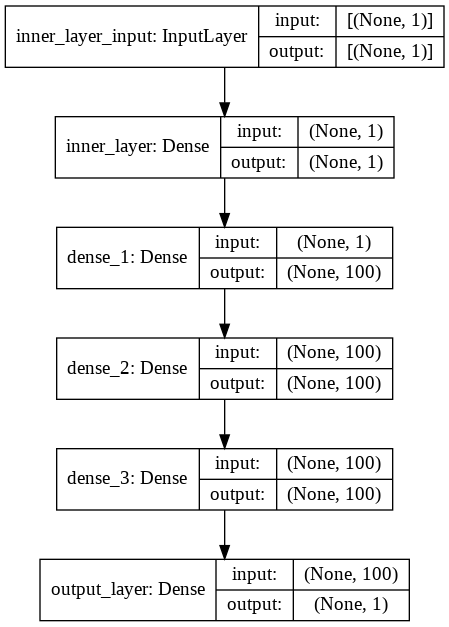

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model1,show_shapes=True)


In [ ]:
new=model1.predict(x_test)

In [ ]:
new[:5],x_test[:5]

(array([[191.66066],
        [195.69539],
        [199.73012],
        [203.76482],
        [207.79953]], dtype=float32),
 <tf.Tensor: shape=(5,), dtype=int32, numpy=array([180, 184, 188, 192, 196], dtype=int32)>)

In [ ]:
y_test[:5]

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([190, 194, 198, 202, 206], dtype=int32)>

In [ ]:
len(x_test),len(new)

(30, 30)

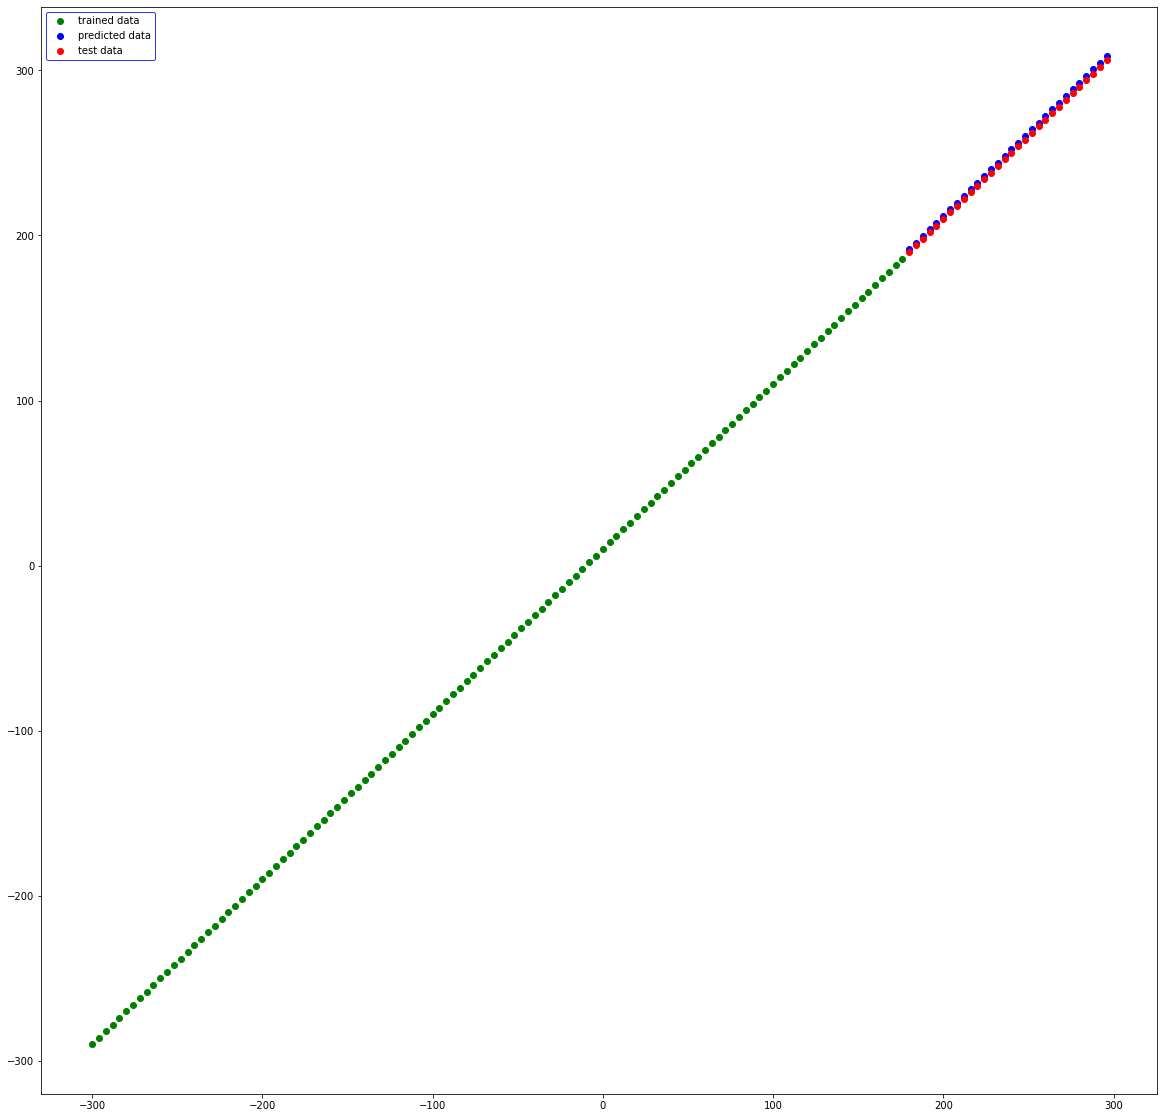

In [ ]:
plt.figure(figsize=(20,20))
plt.scatter(x_train,y_train,c="g",label="trained data")
plt.scatter(x_test,new,c="b",label="predicted data")
plt.scatter(x_test,y_test,c="r",label="test data")
plt.legend(loc="upper left",edgecolor="b")

In [ ]:
model1.predict([180])-190

array([[1.6606598]], dtype=float32)

In [ ]:
from tensorflow.keras.utils import plot_model

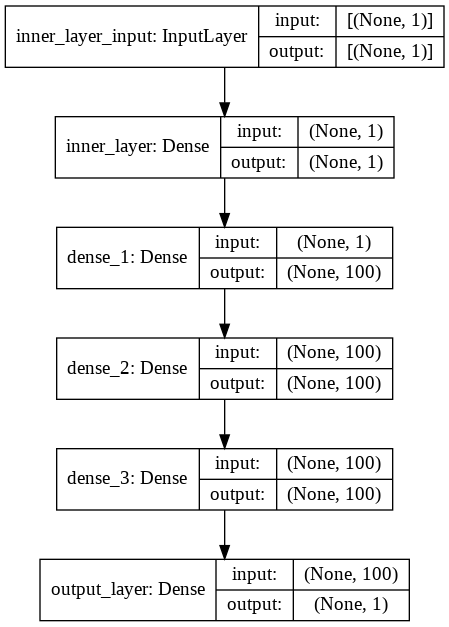

In [ ]:
plot_model(model1,show_shapes=True)

In [ ]:
me=tf.keras.losses.mean_absolute_error(y_true=y_test,
                                       y_pred=tf.squeeze(new))
me

<tf.Tensor: shape=(), dtype=float32, numpy=2.163794>

In [ ]:
maa=tf.keras.losses.mean_squared_error(y_true=y_test,
                                       y_pred=tf.squeeze(new))
maa

<tf.Tensor: shape=(), dtype=float32, numpy=4.7721577>

In [ ]:
np.square(2.163794)

4.682004474436001

In [ ]:
mea=tf.keras.losses.huber(y_true=y_test,
                          y_pred=tf.squeeze(new))
mea

<tf.Tensor: shape=(), dtype=float32, numpy=1.6637939>

In [ ]:
l=tf.range(-100,100,4)
i=tf.range(-90,110,4)

In [ ]:
len(l),len(i)

(50, 50)

In [ ]:
l_train=l[:40]
i_train=i[:40]

l_test=l[40:]
i_test=i[40:]

In [ ]:
len(l_train),len(l_test),len(i_train),len(i_test)

(40, 10, 40, 10)

In [ ]:
tf.random.set_seed(42)
model_20=tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])
model_20.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=["mae"])
model_20.fit(l_train,i_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 14ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 19ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step -

In [ ]:
prediction_1=model_20.predict(l_test)

In [ ]:
def plot_predictions(train_1=l_train,
                     train_2=i_train,
                     test_1=l_test,
                     test_2=i_test,
                     sub=l_test,
                     prediction=prediction_1):
  plt.figure(figsize=(10,10))
  plt.scatter(train_1,train_2,label="train data")
  plt.scatter(test_1,test_2,label="test data")
  plt.scatter(sub,prediction_1,label="prediction data")
  plt.legend()

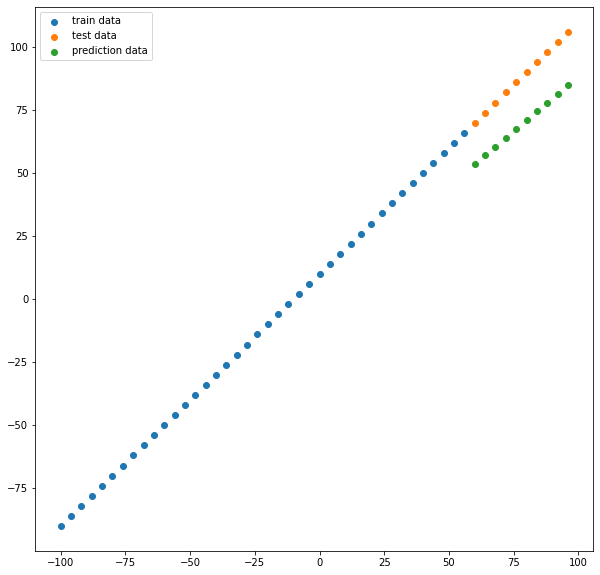

In [ ]:
plot_predictions()

In [ ]:
mae_1=tf.keras.losses.mean_absolute_error(l_test,tf.squeeze(prediction_1))
mse_1=tf.keras.losses.mean_squared_error(l_test,tf.squeeze(prediction_1))
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.745328>,
 <tf.Tensor: shape=(), dtype=float32, numpy=78.666824>)

In [ ]:
model_21=tf.keras.Sequential([
      tf.keras.layers.Dense(10),                       
      tf.keras.layers.Dense(1)
])
model_21.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=["mae"])
model_21.fit(l_train,i_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 73.0019 - mae: 73.0019
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 17.5325 - mae: 17.5325
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 20.4862 - mae: 20.4862
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 13.1871 - mae: 13.1871
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.5492 - mae: 14.5492
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.6087 - mae: 11.6087
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 12.6668 - mae: 12.6668
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.0468 - mae: 11.0468
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 39.7317 - mae: 39.7317
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.2189 - mae: 27.2189
Epoch 11/100
2/2 [==============================] - 0s 8ms/

In [ ]:
predicts_1=model_21.predict(l_test)

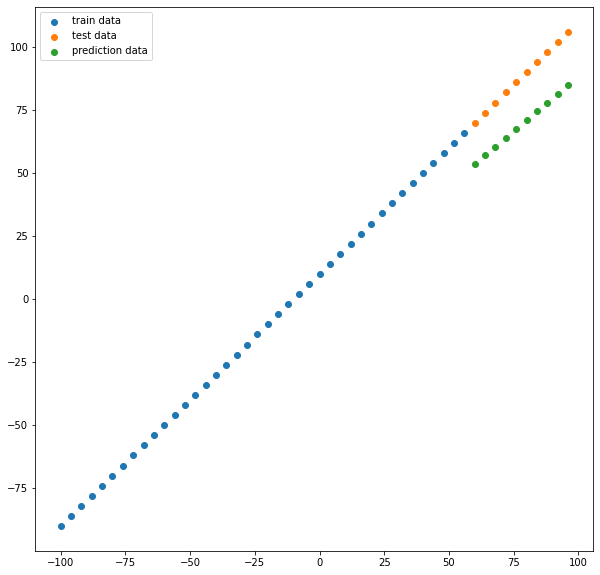

In [ ]:
plot_predictions(prediction=predicts_1)

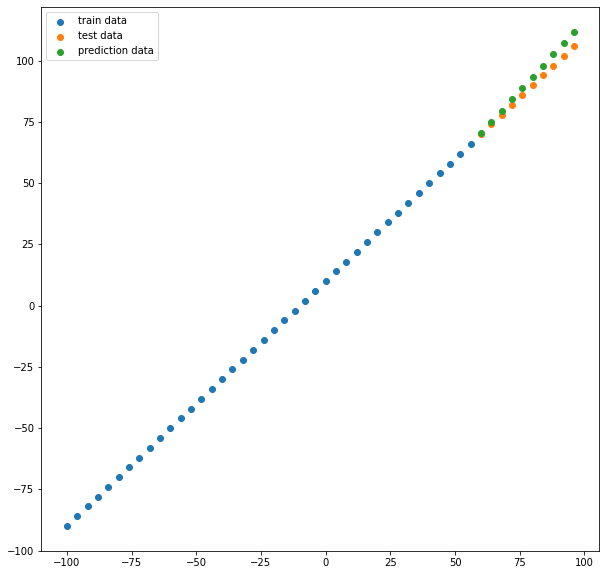

In [ ]:
train_1=l_train,
train_2=i_train,
test_1=l_test,
test_2=i_test,
sub=l_test,
prediction=prediction_1
plt.figure(figsize=(10,10))
plt.scatter(train_1,train_2,label="train data")
plt.scatter(test_1,test_2,label="test data")
plt.scatter(sub,predicts_1,label="prediction data")
plt.legend()

In [ ]:
from tensorflow.keras.utils import plot_model

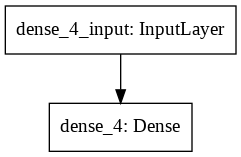

In [ ]:
plot_model(model_20)

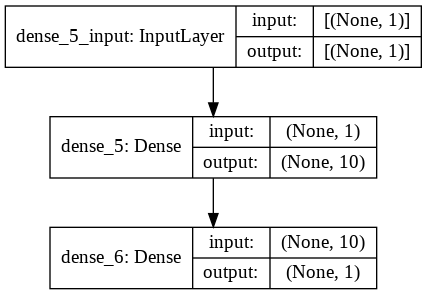

In [ ]:
plot_model(model_21,show_shapes=True)

In [ ]:
tf.random.set_seed(42)
model_22=tf.keras.Sequential([
      tf.keras.layers.Dense(100),                       
      tf.keras.layers.Dense(1)
])
model_22.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=["mae"])
model_22.fit(l_train,i_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 36.0963 - mae: 36.0963
Epoch 2/500
2/2 [==============================] - 0s 3ms/step - loss: 28.7401 - mae: 28.7401
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 33.2070 - mae: 33.2070
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 30.5341 - mae: 30.5341
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 15.5504 - mae: 15.5504
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 12.3355 - mae: 12.3355
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 11.6147 - mae: 11.6147
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 11.2547 - mae: 11.2547
Epoch 9/500
2/2 [==============================] - 0s 11ms/step - loss: 42.3778 - mae: 42.3778
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 29.5266 - mae: 29.5266
Epoch 11/500
2/2 [==============================] - 0s 4ms

In [ ]:
mae_1=tf.keras.losses.mean_absolute_error(l_test,tf.squeeze(predicts_1))
mse_1=tf.keras.losses.mean_squared_error(l_test,tf.squeeze(predicts_1))
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=13.110995>,
 <tf.Tensor: shape=(), dtype=float32, numpy=174.71695>)

In [ ]:
predicts_2=model_22.predict(l_test)

In [ ]:
mae_1=tf.keras.losses.mean_absolute_error(l_test,tf.squeeze(predicts_2))
mse_1=tf.keras.losses.mean_squared_error(l_test,tf.squeeze(predicts_2))
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=57.219166>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3356.6719>)

In [ ]:
i_test,tf.squeeze(predicts_2)

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([17.023079, 17.858135, 18.693192, 19.52825 , 20.363306, 21.198362,
        22.033419, 22.868475, 23.703531, 24.53859 ], dtype=float32)>)

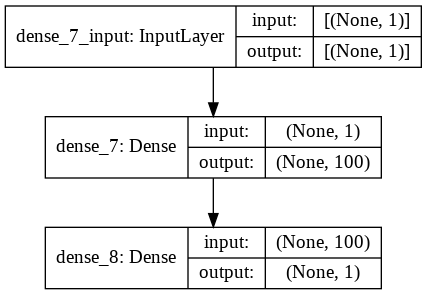

In [ ]:
plot_model(model_22,show_shapes=True)

In [ ]:
fashion=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test)

(60000, 60000, 10000, 10000)

In [ ]:
nat=np.array([5.1398012e-03, 2.0479257e-03, 7.8818065e-01, 1.6590048e-03,
       1.0443723e-01, 1.9315933e-16, 9.8535217e-02, 0.0000000e+00,
       2.8833401e-07, 3.9852847e-21])

([<matplotlib.axis.XTick at 0x7f0b3839c290>,
 <a list of 10 Text major ticklabel objects>)

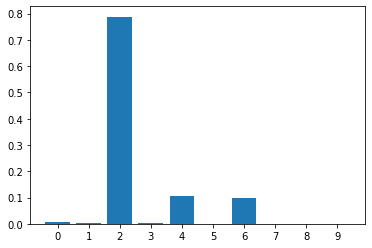

In [ ]:
plt.bar(range(10),nat)
plt.xticks(range(10))

In [ ]:
l_train,i_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
medical_cost=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
medical_cost

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
len(medical_cost)

1338

In [ ]:
medical_cost.shape

(1338, 7)

In [ ]:
insurance=pd.get_dummies(medical_cost)

In [ ]:
insurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
x=insurance.drop("charges",axis=1)
y=insurance["charges"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
tf.random.set_seed(42)
insurance_model=tf.keras.Sequential([
                                     tf.keras.layers.Dense(10),
                                     tf.keras.layers.Dense(1)
])
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
insurance_model.fit(x_train,y_train,epochs=100,verbose=2)

Epoch 1/100
34/34 - 0s - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 - 0s - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 - 0s - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 - 0s - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 - 0s - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 - 0s - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 - 0s - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 - 0s - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 - 0s - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 - 0s - loss: 7493.1743 - mae: 7493.1743
Epoch 11/100
34/34 - 0s - loss: 7769.7295 - mae: 7769.7295
Epoch 12/100
34/34 - 0s - loss: 7706.9028 - mae: 7706.9028
Epoch 13/100
34/34 - 0s - loss: 7687.7231 - mae: 7687.7231
Epoch 14/100
34/34 - 0s - loss: 7689.9004 - mae: 7689.9004
Epoch 15/100
34/34 - 0s - loss: 7393.5327 - mae: 7393.5327
Epoch 16/100
34/34 - 0s - loss: 7780.6987 - mae: 7780.6987
Epoch 17/100
34/34 - 0s - loss: 7578.5098 - mae: 7578.5098
Epoch 

In [ ]:
insurance_model.evaluate(x_test,y_test,verbose=2)

9/9 - 0s - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
predicted=insurance_model.predict(x_test)

In [ ]:
len(x_train),len(y_train),x_train.shape,y_train.shape

(1070, 1070, (1070, 11), (1070,))

In [ ]:
# tf.random.set_seed(42)
# plt.figure(figsize=(10,10))
# plt.scatter(x_train,y_train,c="g",label="train data")
# plt.scatter(x_test,y_test,c="b",label="test data")
# plt.scatter(x_test,predicted,c="r",label="predicted data")
# plt.legend()

In [ ]:
tf.random.set_seed(42)
insurance_model1=tf.keras.Sequential([
                                      tf.keras.layers.Dense(100),
                                      tf.keras.layers.Dense(10),
                                      tf.keras.layers.Dense(1)
])
insurance_model1.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])
history=insurance_model1.fit(x_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7409.0811 - mae:

In [ ]:
insurance_model1.evaluate(x_train,y_train,verbose=2)

34/34 - 0s - loss: 3665.3799 - mae: 3665.3799


[3665.3798828125, 3665.3798828125]

In [ ]:
insurance_model.evaluate(x_train,y_train,verbose=2)

34/34 - 0s - loss: 7070.7476 - mae: 7070.7476


[7070.74755859375, 7070.74755859375]

<Figure size 720x720 with 0 Axes>

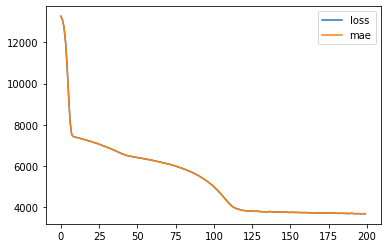

<Figure size 720x720 with 0 Axes>

In [ ]:
pd.DataFrame(history.history).plot()
plt.figure(figsize=(10,10))


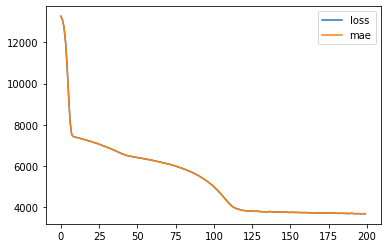

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
h=tf.range(0,10000,2)
e=tf.range(10,10010,2)
h_train=h[:4000]
e_train=e[:4000]
h_test=h[4000:]
e_test=e[4000:]

In [ ]:
50*80


4000

In [ ]:
len(h),len(e)

(5000, 5000)

In [ ]:
e==h+10

<tf.Tensor: shape=(5000,), dtype=bool, numpy=array([ True,  True,  True, ...,  True,  True,  True])>

In [ ]:
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(100),
                           tf.keras.layers.Dense(100),
                           tf.keras.layers.Dense(10),
                           tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])
jet=model.fit(h_train,e_train,epochs=200,verbose=1)

Epoch 1/200
125/125 [==============================] - 1s 2ms/step - loss: 170.0387 - mae: 170.0387
Epoch 2/200
125/125 [==============================] - 0s 2ms/step - loss: 66.5815 - mae: 66.5815
Epoch 3/200
125/125 [==============================] - 0s 2ms/step - loss: 66.9125 - mae: 66.9125
Epoch 4/200
125/125 [==============================] - 0s 2ms/step - loss: 37.2671 - mae: 37.2671
Epoch 5/200
125/125 [==============================] - 0s 2ms/step - loss: 58.3413 - mae: 58.3413
Epoch 6/200
125/125 [==============================] - 0s 2ms/step - loss: 42.6373 - mae: 42.6373
Epoch 7/200
125/125 [==============================] - 0s 2ms/step - loss: 46.9440 - mae: 46.9440
Epoch 8/200
125/125 [==============================] - 0s 2ms/step - loss: 63.5183 - mae: 63.5183
Epoch 9/200
125/125 [==============================] - 0s 2ms/step - loss: 34.0941 - mae: 34.0941
Epoch 10/200
125/125 [==============================] - 0s 2ms/step - loss: 47.6881 - mae: 47.6881
Epoch 11/200
125/

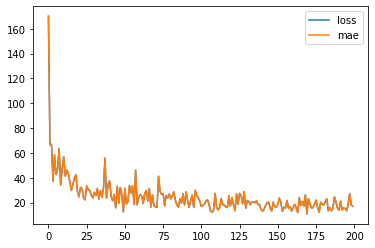

In [ ]:
  pd.DataFrame(jet.history).plot()

In [ ]:
pd.DataFrame(jet.history)

,loss,mae
0,170.038712,170.038712
1,66.581474,66.581474
2,66.912453,66.912453
3,37.267128,37.267128
4,58.341255,58.341255
...,...,...
195,13.433952,13.433952
196,19.071852,19.071852
197,27.180576,27.180576
198,18.053318,18.053318


In [ ]:
insurance[:15]

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
5,31,25.740,0,3756.62160,1,0,1,0,0,0,1,0
6,46,33.440,1,8240.58960,1,0,1,0,0,0,1,0
7,37,27.740,3,7281.50560,1,0,1,0,0,1,0,0
8,37,29.830,2,6406.41070,0,1,1,0,1,0,0,0
9,60,25.840,0,28923.13692,1,0,1,0,0,1,0,0


((array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
  array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
  <a list of 10 Patch objects>),)

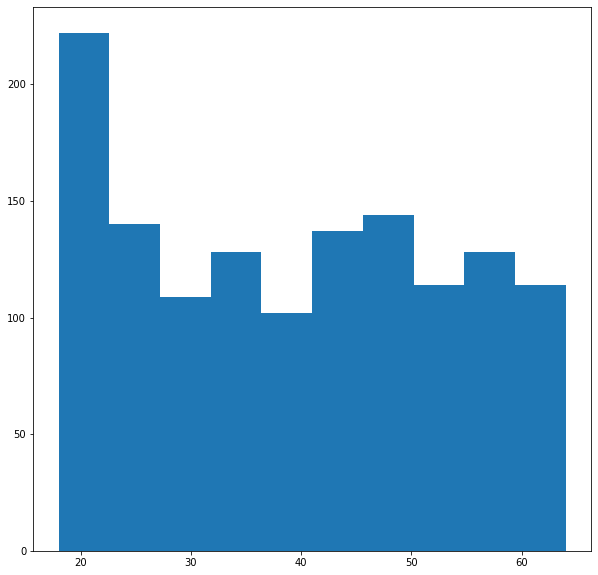

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(insurance["age"]),

In [ ]:
mate=insurance["age"]==18

In [ ]:
livin=np.random.randint(1,100,100)
lirin=np.sin(livin)

(0.0, 100.0)

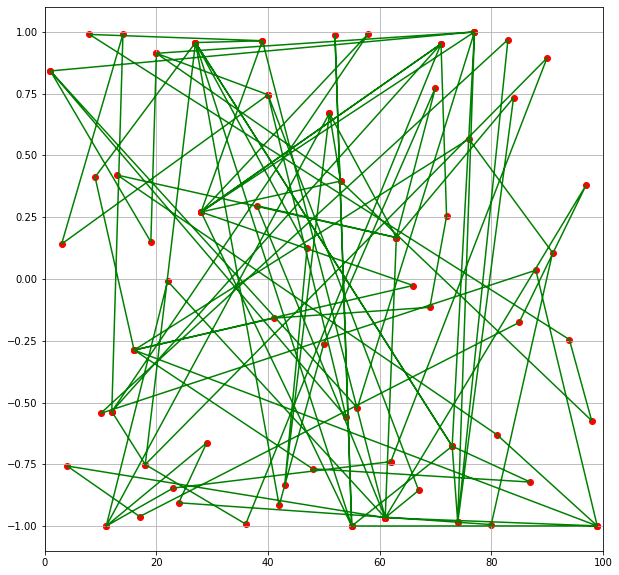

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(livin,lirin,c="g")
plt.scatter(livin,lirin,c="r")
# plt.bar(livin,lirin)
plt.grid(True)
plt.xticks([0,20,40,60,80,100])
plt.xlim(0,100)

In [ ]:
li=np.arange(0,101,10)
lo=np.sin(li)

In [ ]:
lo

array([ 0.        , -0.54402111,  0.91294525, -0.98803162,  0.74511316,
       -0.26237485, -0.30481062,  0.77389068, -0.99388865,  0.89399666,
       -0.50636564])

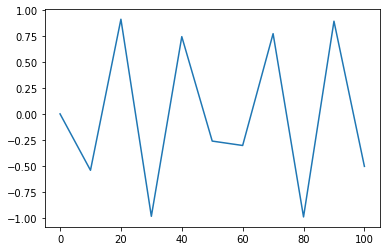

In [ ]:
plt.plot(li,lo)

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import  MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
medical_cost

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
man=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)
x=medical_cost.drop("charges",axis=1)
y=medical_cost["charges"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
man.fit(x_train)
x_train_normal=man.transform(x_train)
x_test_normal=man.transform(x_test)

In [ ]:
x_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
pd.DataFrame(x_train_normal).head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,0.608696,0.107345,0.4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.630435,0.224913,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
medical_cost.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [ ]:
x_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
industry=tf.keras.Sequential([
                              tf.keras.layers.Dense(100),
                              tf.keras.layers.Dense(10),
                              tf.keras.layers.Dense(1)
])
industry.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["mae"])
mac=industry.fit(x_train_normal,y_train,epochs=300)

Epoch 1/300
34/34 [==============================] - 0s 3ms/step - loss: 13344.3066 - mae: 13344.3066
Epoch 2/300
34/34 [==============================] - 0s 1ms/step - loss: 13334.6504 - mae: 13334.6504
Epoch 3/300
34/34 [==============================] - 0s 1ms/step - loss: 13311.5762 - mae: 13311.5762
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 13263.4893 - mae: 13263.4893
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 13178.4941 - mae: 13178.4941
Epoch 6/300
34/34 [==============================] - 0s 1ms/step - loss: 13045.5146 - mae: 13045.5146
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 12854.2246 - mae: 12854.2246
Epoch 8/300
34/34 [==============================] - 0s 1ms/step - loss: 12594.6211 - mae: 12594.6211
Epoch 9/300
34/34 [==============================] - 0s 1ms/step - loss: 12256.8105 - mae: 12256.8105
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 11839.81

In [ ]:
industry.evaluate(x_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3435.5276 - mae: 3435.5276


[3435.527587890625, 3435.527587890625]

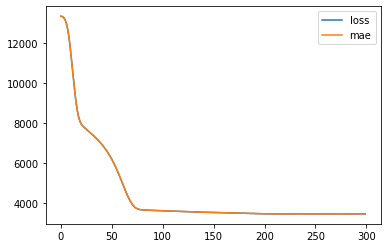

In [ ]:
pd.DataFrame(mac.history).plot()